# Importing dataset

In [ ]:
import numpy as np
import pandas as pd

In [ ]:

import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df= pd.read_csv('/investment_survey.csv')
df

,Gender,Age,Working_professional,Annual_income,Mode_of_investment,Investment_per_month,Motivation_cause,Resources_used,Goal_for_investment,Duration_to_save(in_Years),Unnamed: 10
0,Male,19,0,0,"Banking - RD, FD",200,Family member,Family members/Friends,Wealth generation,10,NaN
1,Female,24,0,0,"Banking - RD, FD",1000,Social media/ Articles,Mobile applications,Wealth generation,3,NaN
2,Male,24,1,400000,"Stocks - Intraday, long term",5000,Social media/ Articles,News articles / Current affairs,Planning for finacial freedom after Retirement,10,NaN
3,Male,22,1,150000,Mutual Funds,2000,Agents/Investment brokers,News articles / Current affairs,Wealth generation,10,NaN
4,Male,25,1,250000,Mutual Funds,2000,Self Interest,Books,Wealth generation,15,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,Male,22,0,0,"Stocks - Intraday, long term",500,Social media/ Articles,Mobile applications,Wealth generation,10,NaN
96,Male,29,1,250000,Mutual Funds,2000,Through Bank,News articles / Current affairs,Personal Savings,2,NaN
97,Female,23,1,150000,"Banking - RD, FD",1000,Family member,Family members/Friends,Construction of own House / Buying a new Car,10,NaN
98,Female,22,0,0,Mutual Funds,1000,Through Bank,Mobile applications,Wealth generation,6,NaN


In [ ]:
df.shape

(100, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       100 non-null    object 
 1   Age                          100 non-null    int64  
 2   Working_professional         100 non-null    int64  
 3   Annual_income                100 non-null    int64  
 4   Mode_of_investment           100 non-null    object 
 5   Investment_per_month         100 non-null    object 
 6   Motivation_cause             100 non-null    object 
 7   Resources_used               100 non-null    object 
 8   Goal_for_investment          100 non-null    object 
 9   Duration_to_save(in_Years)   100 non-null    object 
 10  Unnamed: 10                  0 non-null      float64
dtypes: float64(1), int64(3), object(7)
memory usage: 8.7+ KB


In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Working_professional,0
Annual_income,0
Mode_of_investment,0
Investment_per_month,0
Motivation_cause,0
Resources_used,0
Goal_for_investment,0
Duration_to_save(in_Years),0


In [ ]:
df.head(10)

,Gender,Age,Working_professional,Annual_income,Mode_of_investment,Investment_per_month,Motivation_cause,Resources_used,Goal_for_investment,Duration_to_save(in_Years),Unnamed: 10
0,Male,19,0,0,"Banking - RD, FD",200,Family member,Family members/Friends,Wealth generation,10,NaN
1,Female,24,0,0,"Banking - RD, FD",1000,Social media/ Articles,Mobile applications,Wealth generation,3,NaN
2,Male,24,1,400000,"Stocks - Intraday, long term",5000,Social media/ Articles,News articles / Current affairs,Planning for finacial freedom after Retirement,10,NaN
3,Male,22,1,150000,Mutual Funds,2000,Agents/Investment brokers,News articles / Current affairs,Wealth generation,10,NaN
4,Male,25,1,250000,Mutual Funds,2000,Self Interest,Books,Wealth generation,15,NaN
5,Male,27,1,384000,Crypto currency,3000,Social media/ Articles,Social media/ Articles,Wealth generation,5,NaN
6,Male,24,1,150000,Not prepared,2000,No one,Family members/Friends,Planning for finacial freedom after Retirement,15,NaN
7,Female,22,0,0,Gold / Any other Materialistic investment,500,Family member,Family members/Friends,Personal Savings,10,NaN
8,Female,25,0,0,"Banking - RD, FD",2000,Family member,Family members/Friends,Personal Savings,5,NaN
9,Male,28,1,500000,"Stocks - Intraday, long term",5000,Friends,Mobile applications,Wealth generation,10,NaN


In [ ]:
df.describe()

,Age,Working_professional,Annual_income,Unnamed: 10
count,100.000000,100.000000,100.000000,0.0
mean,25.370000,0.590000,166440.800000,NaN
std,5.781641,0.494311,161676.882399,NaN
min,18.000000,0.000000,0.000000,NaN
25%,22.000000,0.000000,0.000000,NaN
50%,24.000000,1.000000,150000.000000,NaN
75%,27.000000,1.000000,300000.000000,NaN
max,56.000000,1.000000,600000.000000,NaN


In [ ]:
df.drop([col for col in df.columns if 'Unnamed' in col], axis=1, inplace=True)
df

,Gender,Age,Working_professional,Annual_income,Mode_of_investment,Investment_per_month,Motivation_cause,Resources_used,Goal_for_investment,Duration_to_save(in_Years)
0,Male,19,0,0,"Banking - RD, FD",200,Family member,Family members/Friends,Wealth generation,10
1,Female,24,0,0,"Banking - RD, FD",1000,Social media/ Articles,Mobile applications,Wealth generation,3
2,Male,24,1,400000,"Stocks - Intraday, long term",5000,Social media/ Articles,News articles / Current affairs,Planning for finacial freedom after Retirement,10
3,Male,22,1,150000,Mutual Funds,2000,Agents/Investment brokers,News articles / Current affairs,Wealth generation,10
4,Male,25,1,250000,Mutual Funds,2000,Self Interest,Books,Wealth generation,15
...,...,...,...,...,...,...,...,...,...,...
95,Male,22,0,0,"Stocks - Intraday, long term",500,Social media/ Articles,Mobile applications,Wealth generation,10
96,Male,29,1,250000,Mutual Funds,2000,Through Bank,News articles / Current affairs,Personal Savings,2
97,Female,23,1,150000,"Banking - RD, FD",1000,Family member,Family members/Friends,Construction of own House / Buying a new Car,10
98,Female,22,0,0,Mutual Funds,1000,Through Bank,Mobile applications,Wealth generation,6


In [ ]:
df['Investment_per_month'] = df['Investment_per_month'].replace('Nil', np.nan).str.replace(',', '').astype(float)
df['Duration_to_save(in_Years) '] = df['Duration_to_save(in_Years) '].replace('Nil', np.nan).str.replace(',', '').astype(float)

# Fill missing values with the median of the respective columns
df['Investment_per_month'].fillna(df['Investment_per_month'].median(), inplace=True)
df['Duration_to_save(in_Years) '].fillna(df['Duration_to_save(in_Years) '].median(), inplace=True)

<Axes: ylabel='count'>

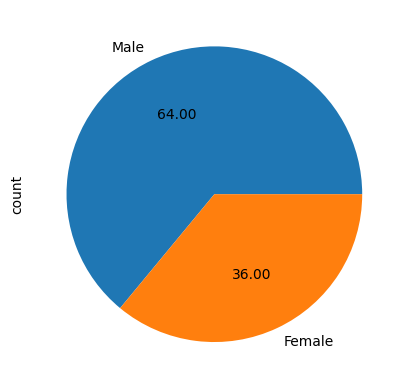

In [ ]:
df['Gender'].value_counts().plot(kind="pie",autopct="%.2f")


<Axes: xlabel='Mode_of_investment'>

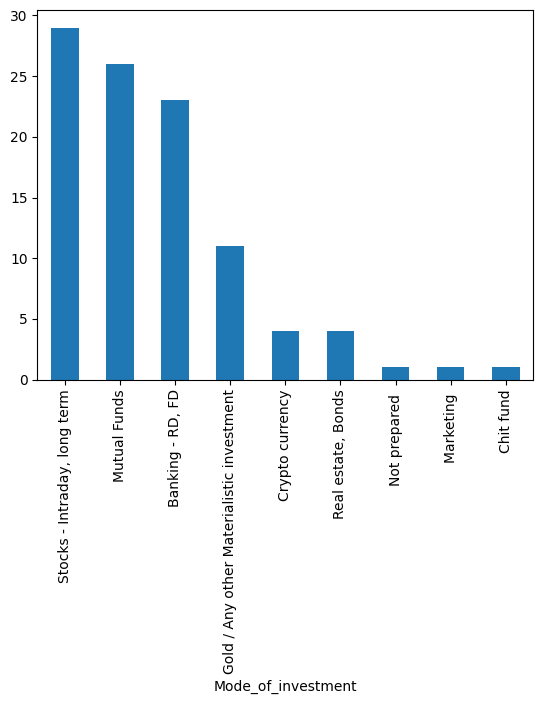

In [ ]:
df['Mode_of_investment'].value_counts().plot(kind='bar')

(array([18., 42., 30.,  3.,  3.,  1.,  0.,  2.,  0.,  1.]),
 array([18. , 21.8, 25.6, 29.4, 33.2, 37. , 40.8, 44.6, 48.4, 52.2, 56. ]),
 <BarContainer object of 10 artists>)

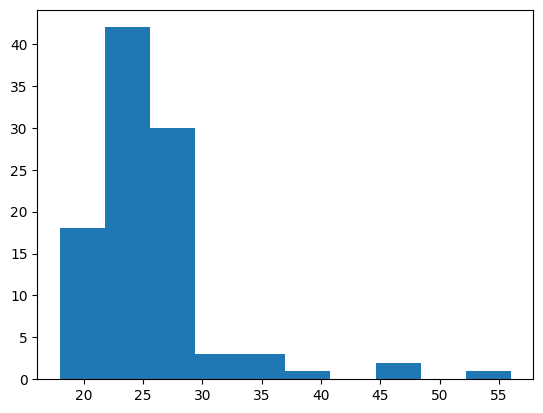

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['Age'],bins=10)

<Axes: xlabel='Age', ylabel='Density'>

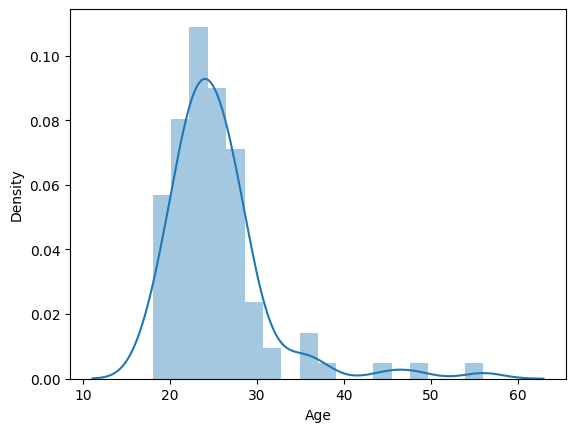

In [ ]:
sns.distplot(df['Age'])

<Axes: ylabel='Age'>

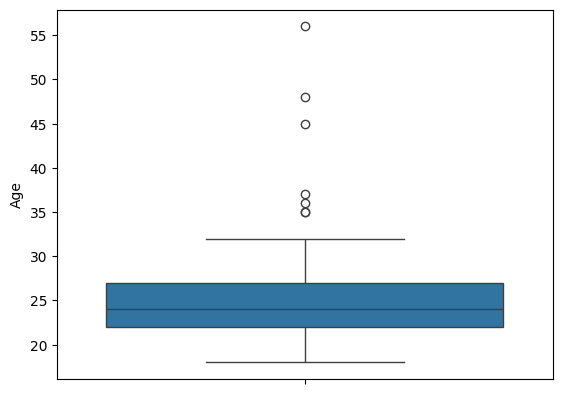

In [ ]:
sns.boxplot(df['Age'])

<Axes: xlabel='Age', ylabel='Annual_income'>

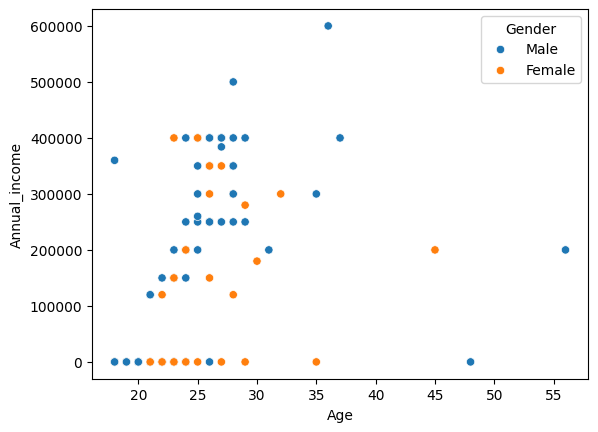

In [ ]:
sns.scatterplot(x='Age',y='Annual_income',hue='Gender',data=df)

In [ ]:
correlation = df.corr(numeric_only = True)
correlation

,Age,Working_professional,Annual_income,Investment_per_month,Duration_to_save(in_Years)
Age,1.000000,0.368176,0.359833,-0.086826,0.113077
Working_professional,0.368176,1.000000,0.816991,-0.046990,0.198597
Annual_income,0.359833,0.816991,1.000000,0.253934,0.168176
Investment_per_month,-0.086826,-0.046990,0.253934,1.000000,-0.145954
Duration_to_save(in_Years),0.113077,0.198597,0.168176,-0.145954,1.000000


In [ ]:
df.columns.tolist()

['Gender',
 'Age',
 'Working_professional',
 'Annual_income',
 'Mode_of_investment',
 'Investment_per_month',
 'Motivation_cause',
 'Resources_used',
 'Goal_for_investment',
 'Duration_to_save(in_Years) ']

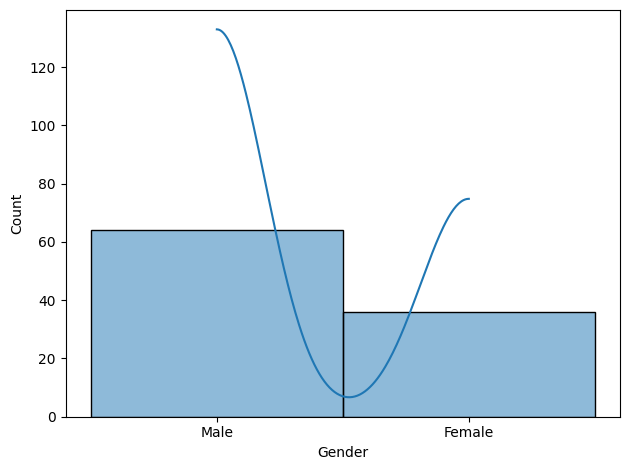

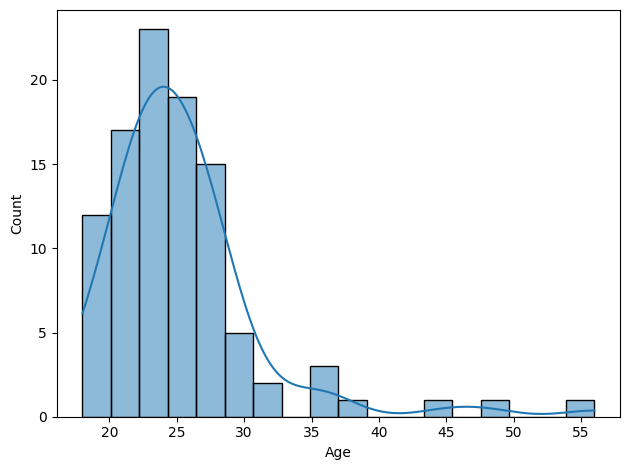

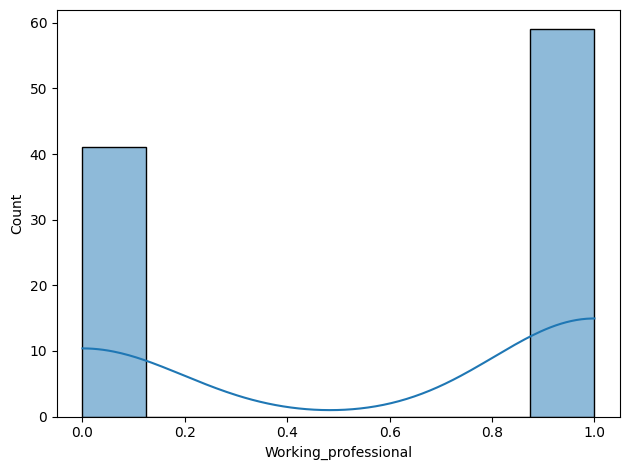

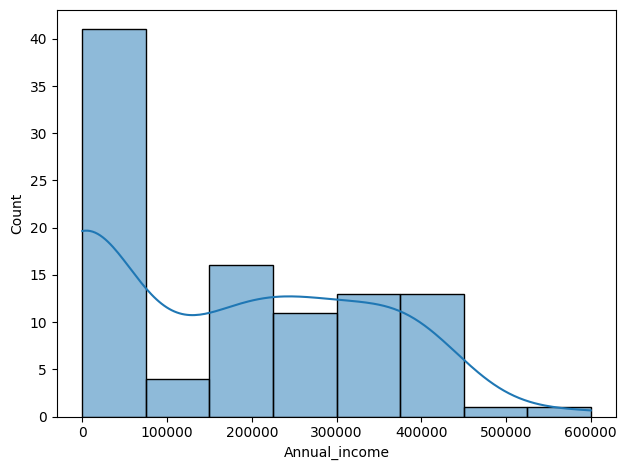

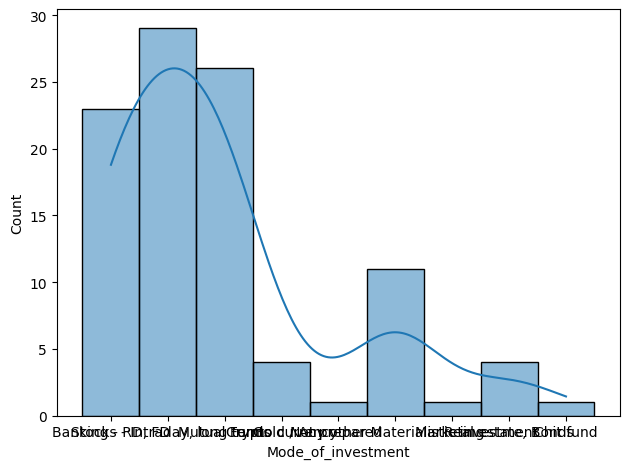

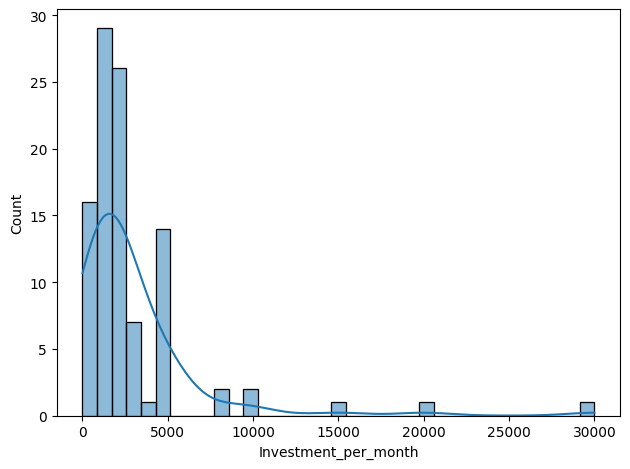

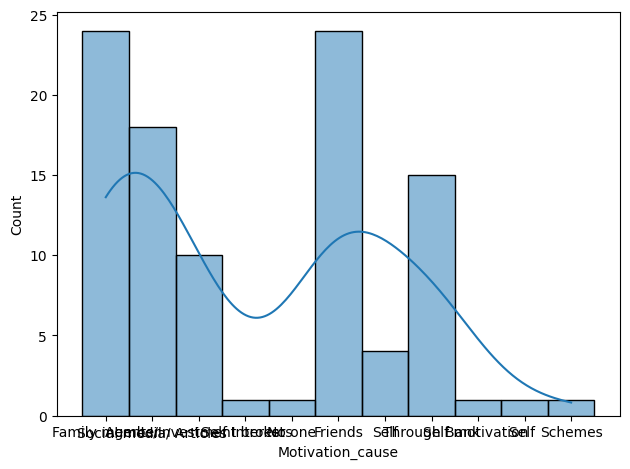

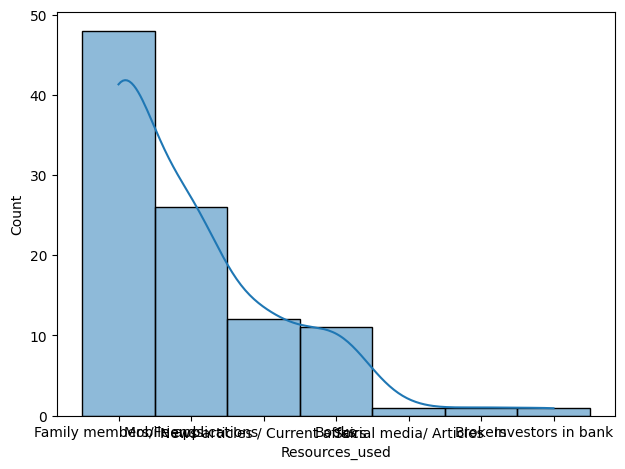

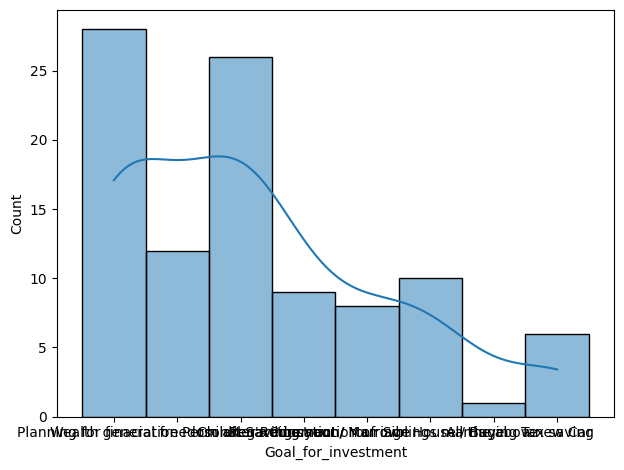

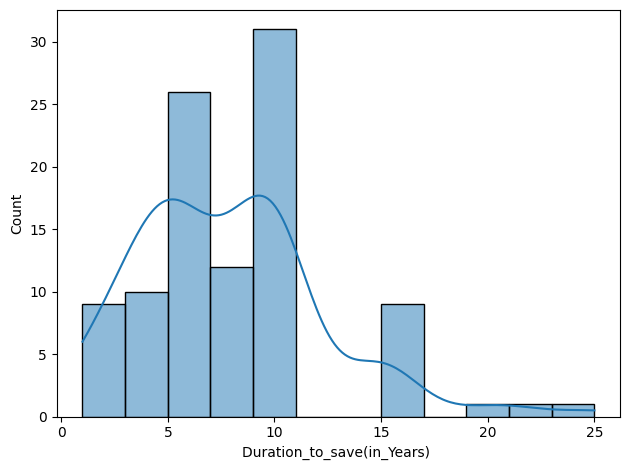

In [ ]:
for col in df:
    sns.histplot(x=col,data=df,kde=True)
    plt.tight_layout()
    plt.show()


#Predictive modal for Investment Survey

In [ ]:
#predictice MOdal for investment survey
X = df[['Age', 'Annual_income', 'Investment_per_month']]
y = df['Working_professional']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
#Modal Fitting
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.03333333333333333
R-squared: 0.8295454545454546


# Evaluation of model

In [ ]:
#Evaluation of model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.9666666666666667,
 array([[ 8,  0],
        [ 1, 21]]),
 '              precision    recall  f1-score   support\n\n           0       0.89      1.00      0.94         8\n           1       1.00      0.95      0.98        22\n\n    accuracy                           0.97        30\n   macro avg       0.94      0.98      0.96        30\nweighted avg       0.97      0.97      0.97        30\n')

<Axes: ylabel='Annual_income'>

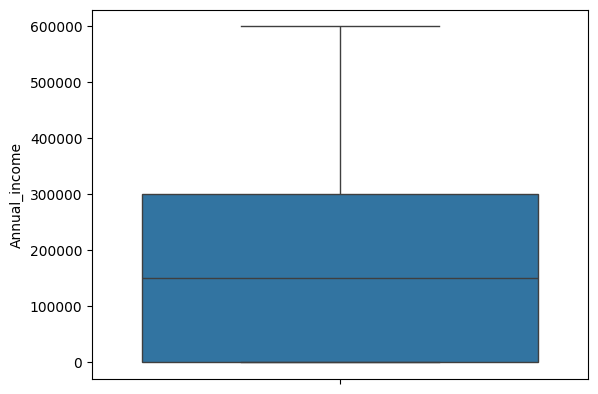

In [ ]:
sns.boxplot(df['Annual_income'])